### Task 3: Unsupervised learning - prediction and visualization using Kmeans clustering

### Name: Sanjana Basu

Unsupervised learning involves building a machine learning algorithm that can draw inferences from datasets without labelling the responses. In other words, classifying the datasets into clusters using the training set and later using the trained model to identify which cluster the test data will automatically go into.

K-means clustering is a very good technique to carry out unsupervised learning. This involves splitting the dataset into K number of clusters. Then random but unique centroids are chosen for each cluster and that is used to train the KNN classifier. This classifier is used to build the initial random set of clusters. Thereafter the centroid keeps adjusting itself to the mean of the clusters and this is a process that goes on for several iterations till the centroid stabilizes.

In this notebook, I have demonstrated basic clustering on Iris dataset with 150 rows as well gone a step further with the churn dataset that requires a bit more technique in terms of feature engineering while dealing with a fairly large dataset with over 7000 rows and 10+ features

__________________________________________________________________________________________________________________________________

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

### Reading the file

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking for NaN values

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Dropping irrelevant columns

In [5]:
df1=df.drop('Id',axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df2=df1.drop('Species',axis=1)
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
x1=df2.values
from sklearn import preprocessing
X = preprocessing.scale(x1)

### Using the elbow method to find out the number of clusters

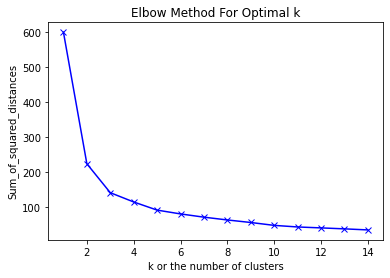

In [8]:
from sklearn.cluster import KMeans
Sum_of_squared_distances=[]
for k in range(1,15):
        km = KMeans(n_clusters=k, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
        km.fit(X)
        Sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k or the number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


We see the elbow at 3 hence n_clusters or number of clusters is 3

In [9]:
y=np.array(df1['Species'])

### Building the model and training it

In [10]:
kmeans = KMeans(n_clusters=3, init = 'k-means++',
                max_iter = 300)
kmeans.fit(X)

KMeans(n_clusters=3)

In [11]:
kmeans_pred = kmeans.predict(X)


### Plotting the model

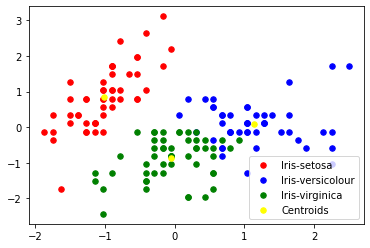

In [12]:
plt.scatter(X[kmeans_pred == 0, 0], X[kmeans_pred == 0, 1], 
            s = 30, c = 'red', label = 'Iris-setosa')
plt.scatter(X[kmeans_pred == 1, 0], X[kmeans_pred == 1, 1], 
            s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[kmeans_pred == 2, 0], X[kmeans_pred == 2, 1], 
            s = 30, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 30, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

### Cross- checking the cluster sizes 

In [13]:
pd.crosstab(kmeans_pred, columns=kmeans_pred)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,0
2,0,0,53


In [14]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace= True)

In [15]:
df['Species_predicted']=kmeans_pred

In [16]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_predicted
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


In [17]:
a=df['Species'].value_counts().values
b=df['Species_predicted'].value_counts()
check=pd.DataFrame({'Actual':a,'Model':b},columns=['Actual','Model'])
check

,Actual,Model
2,50,53
0,50,50
1,50,47


Between 1 and 2, there are very few errors which is minimal in a dataset of 150 entries.

## Clustering using kmean for Telco Churn dataset

In [18]:
data=pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [19]:
data1=data

In [20]:
data1['gender']=data1['gender'].replace({'Male':0,'Female':1})

In [21]:
data1[['Partner','Dependents','PhoneService','OnlineBackup','TechSupport',
      'StreamingTV','PaperlessBilling']]=data1[['Partner','Dependents','PhoneService','OnlineBackup','TechSupport',
      'StreamingTV','PaperlessBilling']].replace({'No':0,'Yes':1})

In [22]:
data1['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2},inplace=True)
data1['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,
                                'Credit card (automatic)':3},inplace=True)

In [23]:
data1[['OnlineBackup','TechSupport','StreamingTV']]=data1[['OnlineBackup','TechSupport','StreamingTV']].replace({'No internet service':0})

In [24]:
data1.drop('customerID',axis=1,inplace=True)

In [25]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,1,0,0,0,1,0,29.85,No
1,0,0,0,0,34,1,0,0,0,1,0,1,56.95,No
2,0,0,0,0,2,1,1,0,0,0,1,1,53.85,Yes
3,0,0,0,0,45,0,0,1,0,1,0,2,42.30,No
4,1,0,0,0,2,1,0,0,0,0,1,0,70.70,Yes


In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   OnlineBackup      7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   StreamingTV       7043 non-null   int64  
 9   Contract          7043 non-null   int64  
 10  PaperlessBilling  7043 non-null   int64  
 11  PaymentMethod     7043 non-null   int64  
 12  MonthlyCharges    7043 non-null   float64
 13  Churn             7043 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 770.5+ KB


In [27]:
data1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineBackup        0
TechSupport         0
StreamingTV         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [28]:
data2=data1.drop('Churn',axis=1)
x1=data2.values
from sklearn import preprocessing
X = preprocessing.scale(x1)

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init = 'k-means++',
                max_iter = 1300)
kmeans.fit(X)

KMeans(max_iter=1300, n_clusters=2)

In [30]:
kmeans_pred = kmeans.predict(X)

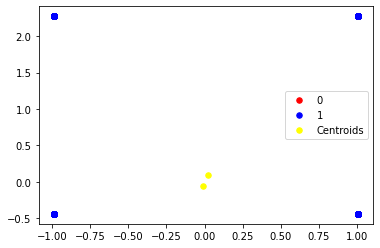

In [31]:
plt.scatter(X[kmeans_pred == 0, 0], X[kmeans_pred == 0, 1], 
            s = 30, c = 'red', label = '0')
plt.scatter(X[kmeans_pred == 1, 0], X[kmeans_pred == 1, 1], 
            s = 30, c = 'blue', label = '1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 30, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [32]:
data2['Churn_pred']=kmeans_pred
a=data['Churn'].value_counts().values
b=data2['Churn_pred'].value_counts()
check=pd.DataFrame({'Actual':a,'Model':b},columns=['Actual','Model'])
check

,Actual,Model
1,5174,4409
0,1869,2634


Despite being a huge dataset, the initial model has clustered pretty well

## THANK YOU